In [80]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd
from distfit import distfit
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.stats import lognorm
import numpy.ma as ma


In [81]:
# import list of best-performing flares
filename = '/Users/coletamburri/Desktop/Impulsiveness_Paper/imp_dev/all_and_best_Jan_2024_alt.mat'
dat = sio.loadmat(filename)

In [4]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

In [170]:
recmax_arr

array([[ 2.88668587e+18, -4.55904525e+18],
       [ 2.34798372e+18, -4.92842893e+18],
       [ 2.79771366e+18, -2.37464412e+18],
       [ 7.71058862e+18, -1.37977901e+19],
       [ 4.70703072e+18, -3.19581301e+18],
       [ 8.76805341e+17, -4.66523162e+17],
       [ 2.55948880e+18, -4.54653913e+18],
       [ 3.00261287e+18, -5.88348067e+18],
       [ 1.49650501e+18, -1.85283982e+18],
       [ 3.49025453e+18, -8.52994386e+17],
       [ 7.03429112e+18, -4.54981430e+18],
       [ 1.05647200e+18, -1.13446730e+18],
       [ 3.40489944e+18, -4.13347680e+18],
       [ 3.49332491e+18, -2.62929322e+18],
       [ 3.14264173e+18, -3.44128668e+18],
       [ 1.44671885e+18, -1.76486542e+18],
       [ 2.00464980e+18, -3.23564172e+18],
       [ 1.09955088e+19, -1.03392521e+19],
       [ 2.21104160e+18, -3.44693459e+18],
       [ 3.77724768e+18, -2.04665706e+18],
       [ 1.31229835e+19, -8.18259577e+18],
       [ 6.05351245e+18, -4.05806295e+18],
       [ 1.99041415e+18, -4.46553041e+18],
       [ 2.

In [156]:
all_imp = dat['curly_Is_relative']
best_imp_arr = dat['curly_Is_relative_best']
recmax_arr = dat['recmax']
recmax = recmax_arr[:,0]
recerr = np.abs(recmax_arr[:,0]-np.abs(recmax_arr[:,1]))
recmaxmean = []
flxmean=[]
imb=[]
imbrate = []

for i in range(len(recflx)):
    imb.append(np.abs(np.abs(recflx[i,0])-np.abs(recflx[i,1])))
for i in range(len(recmax_arr)):
    imbrate.append(np.abs(np.abs(recmax_arr[i,0]-np.abs(recmax_arr[i,1]))))
for i in range(np.shape(recmax_arr)[0]):
    pos = recmax_arr[i,0]/1e18
    neg = recmax_arr[i,1]/1e18
    recmaxmean.append((pos-neg)/2)
for i in range(np.shape(recflx)[0]):
    posflx = recflx[i,0]
    negflx = recflx[i,1]
    flxmean.append((posflx-negflx)/2)
    
best_imp = best_imp_arr[:,0]
bestflaresname = dat['bestflaresname']

badidx = 387

recmax = np.delete(recmax,badidx)
best_imp = np.delete(best_imp,badidx)
bestflaresname = np.delete(bestflaresname,badidx)
recerr = np.delete(recerr,badidx)
recmaxmean = np.delete(recmaxmean,badidx)
flxmean=np.delete(flxmean,badidx)
posflx = recflx[:,0]
posflx=np.delete(posflx,badidx)
imb = np.delete(imb,badidx)
imbrate = np.delete(imbrate,badidx)
imbprop = []
imbproprate = []
for i in range(np.shape(imb)[0]):
    imbprop.append(imb[i]/posflx[i])
    
for i in range(np.shape(imbrate)[0]):
    imbproprate.append(imbrate[i]/recmaxmean[i]/1e18)


In [160]:
imbrate

array([1.67235938e+18, 2.58044521e+18, 4.23069534e+17, 6.08720149e+18,
       1.51121771e+18, 4.10282180e+17, 1.98705033e+18, 2.88086780e+18,
       3.56334814e+17, 2.63726000e+18, 2.48447682e+18, 7.79953004e+16,
       7.28577361e+17, 8.64031696e+17, 2.98644950e+17, 3.18146576e+17,
       1.23099192e+18, 6.56256709e+17, 1.23589299e+18, 1.73059062e+18,
       4.94038777e+18, 1.99544950e+18, 2.47511612e+18, 1.58778041e+18,
       1.62862411e+16, 3.21216000e+17, 6.15504135e+17, 6.62963950e+18,
       7.48575004e+15, 9.83354272e+17, 4.36684677e+18, 3.80081172e+17,
       9.22375467e+18, 2.03244972e+18, 8.70446797e+17, 4.03065570e+17,
       4.73490279e+18, 1.06270658e+18, 1.09644729e+18, 1.46132572e+18,
       5.79600408e+17, 2.98842340e+18, 4.54799433e+18, 3.51701994e+18,
       9.41812798e+17, 5.89489965e+17, 4.04257578e+17, 1.78511059e+18,
       4.20172129e+18, 2.59008436e+18, 1.18768394e+18, 2.57709253e+18,
       7.93692776e+17, 6.68088279e+17, 9.98478604e+17, 4.83322497e+17,
      

(100.0, 200.0)

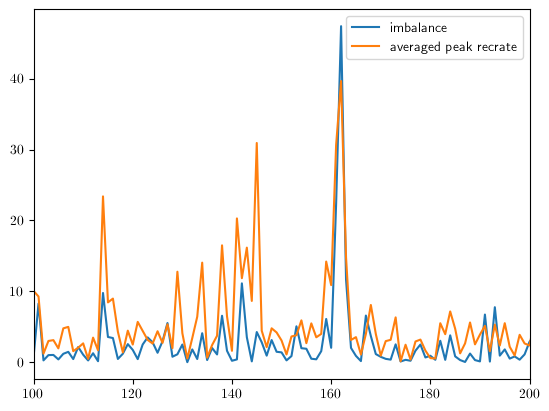

In [168]:
fig,ax=plt.subplots()
ax.plot(imbrate/1e18,label='imbalance')
ax.plot(recmaxmean,label='averaged peak recrate')
ax.legend()
ax.set_xlim([100,200])

In [166]:
np.median(imbproprate)

0.36808064225818105

In [58]:
string = bestflaresname[0][0]
string[-4]

'M'

In [59]:
goes_flux = []
for i in range(len(bestflaresname)):
    
    string = bestflaresname[i][0]
    if string[-4] == 'B':
        pwr = 1e-7
    elif string[-4] == 'C':
        pwr = 1e-6
    elif string[-4] == 'M':
        pwr = 1e-5
    elif string[-4] == 'X':
        pwr = 1e-4
    
    mult = float(bestflaresname[i][0][-3:])
    
    flux = mult*pwr
    goes_flux.append(flux)
                 
                 

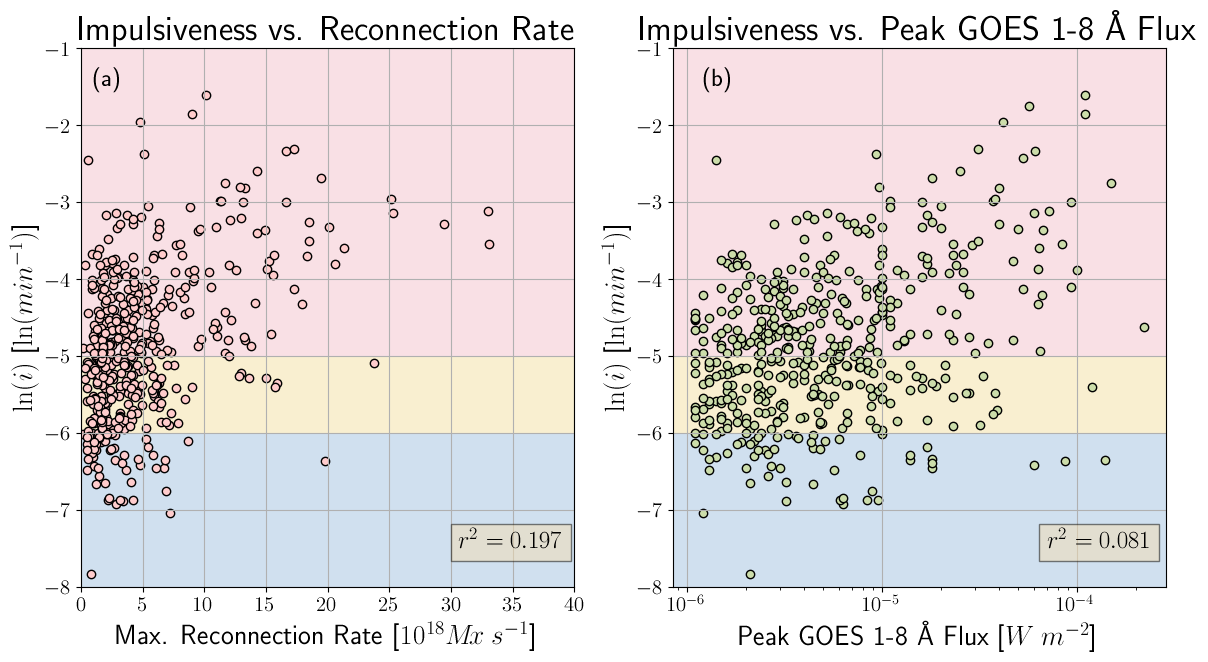

In [167]:
from matplotlib.ticker import FuncFormatter

def math_formatter(x, pos):
    return "$%s$"% int(x)

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

ax1.axhspan(-8, -6, facecolor='#6699CC', alpha=0.3)
ax1.axhspan(-6, -5, facecolor='#EECC66', alpha=0.3)
ax1.axhspan(-5, -1, facecolor='#EE99AA', alpha=0.3)

ax1.scatter(recmax/1e18,best_imp,facecolor='#FFCCCC',edgecolor='black')
#ax1.errorbar(recmax/1e18,best_imp, xerr=recerr/1e18,fmt="o")

ax1.grid()
ax1.set_xlim([0,40])
x=list(range(0,45,5))
y=range(-8,0,1)
ax1.set_yticklabels(y,fontsize=15)
ax1.set_xticklabels(x,fontsize=15)

ax1.xaxis.set_major_formatter(FuncFormatter(math_formatter))
ax1.yaxis.set_major_formatter(FuncFormatter(math_formatter)) 

ax1.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax1.set_xlabel('Max. Reconnection Rate [$10^{18} M\!x\: s^{-1}$]',fontsize=20)
ax1.set_title('Impulsiveness vs. Reconnection Rate',fontsize=25)

props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax1.text(30.6,-7.5, r'$r^2 = 0.197$', fontsize=18,bbox = props)
ax1.text(1,-1.5, r'(a)', fontsize=18)

ax1.set_ylim(-8,-1)


ax2.axhspan(-8, -6, facecolor='#6699CC', alpha=0.3)
ax2.axhspan(-6, -5, facecolor='#EECC66', alpha=0.3)
ax2.axhspan(-5, -1, facecolor='#EE99AA', alpha=0.3)

ax2.scatter(goes_flux,best_imp,facecolor='#CCDDAA',edgecolor='black')
ax2.grid()
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax2.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax2.set_xlabel('Peak GOES 1-8 \AA\ Flux [$W\:m^{-2}$]',fontsize=20)
ax2.set_title('Impulsiveness vs. Peak GOES 1-8 \AA\ Flux',fontsize=25)
props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax2.text(7e-5,-7.5, r'$r^2 = 0.081$', fontsize=18,bbox = props)
ax2.text(1.2e-6,-1.5, r'(b)', fontsize=18)

ax2.set_ylim(-8,-1)

plt.savefig('/Users/coletamburri/Desktop/imp_goes_recrate.png', dpi=300)

In [248]:
np.shape(imbrate)

(480,)

In [246]:
from sklearn import preprocessing

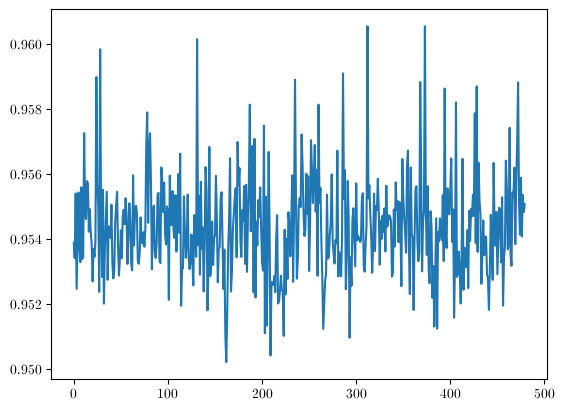

In [271]:
plt.plot(alphas[0])

In [284]:
bars[0]

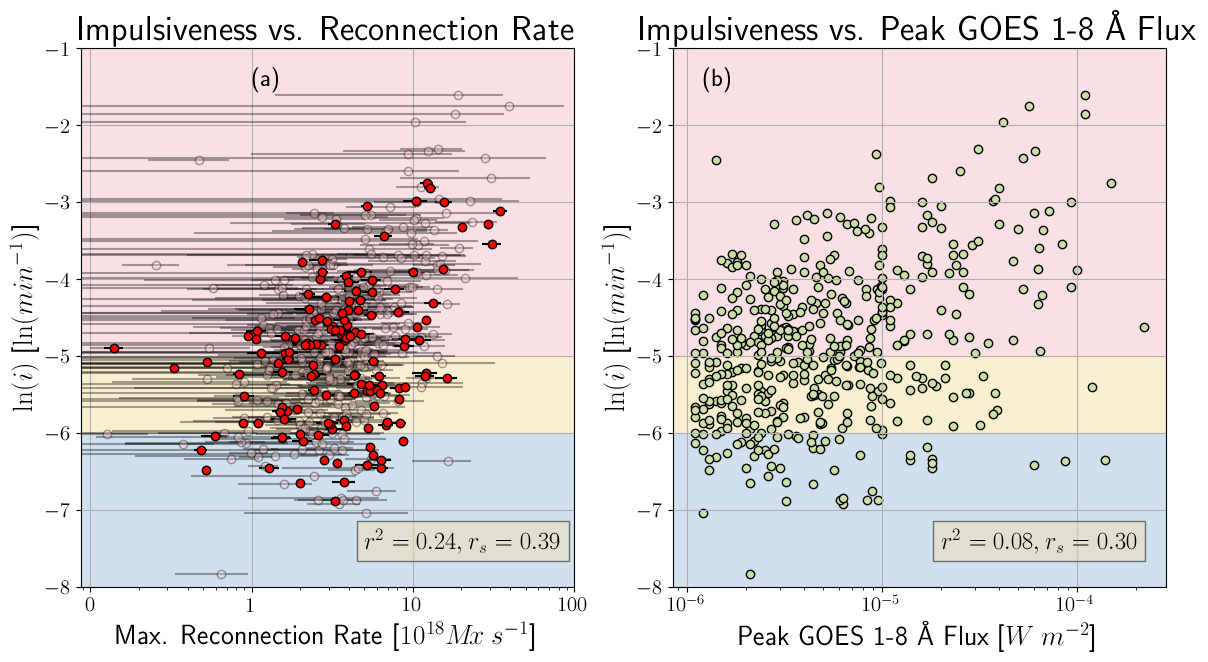

In [311]:
from matplotlib.ticker import FuncFormatter

def math_formatter(x, pos):
    return "$%s$"% int(x)

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

ax1.axhspan(-8, -6, facecolor='#6699CC', alpha=0.3)
ax1.axhspan(-6, -5, facecolor='#EECC66', alpha=0.3)
ax1.axhspan(-5, -1, facecolor='#EE99AA', alpha=0.3)
alphas = 1- preprocessing.normalize([np.log(imbrate)])

ax1.errorbar(recmaxmean,best_imp, xerr=imbrate/1e18,fmt="o",alpha = 0.35,ecolor='black',markerfacecolor='#FFCCCC',markeredgecolor='black',capthick=2)
ax1.errorbar(recmaxmean_ex,best_imp_ex, xerr=imbrate_ex,fmt="o",ecolor='black',markerfacecolor='red',markeredgecolor='black')
ax1.set_xscale("log")

ax1.grid()
ax1.set_xlim([0,100])
x=list(range(0,100,20))
y=range(-8,0,1)
ax1.set_yticklabels(y,fontsize=15)
ax1.set_xticklabels(x,fontsize=15)

ax1.xaxis.set_major_formatter(FuncFormatter(math_formatter))
ax1.yaxis.set_major_formatter(FuncFormatter(math_formatter)) 

ax1.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax1.set_xlabel('Max. Reconnection Rate [$10^{18} M\!x\: s^{-1}$]',fontsize=20)
ax1.set_title('Impulsiveness vs. Reconnection Rate',fontsize=25)
props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax1.text(5,-7.5, r'$r^2 = 0.24, r_s = 0.39$', fontsize=18,bbox = props)
ax1.text(1,-1.5, r'(a)', fontsize=18)

ax1.set_ylim(-8,-1)


ax2.axhspan(-8, -6, facecolor='#6699CC', alpha=0.3)
ax2.axhspan(-6, -5, facecolor='#EECC66', alpha=0.3)
ax2.axhspan(-5, -1, facecolor='#EE99AA', alpha=0.3)
ax2.scatter(goes_flux,best_imp,facecolor='#CCDDAA',edgecolor='black')
#ax2.scatter(goes_flux,best_imp,facecolor='#CCDDAA',edgecolor='black',alpha=0.35)
#ax2.scatter(goes_flux_ex,best_imp_ex,facecolor='red',edgecolor='black')

ax2.grid()
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax2.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax2.set_xlabel('Peak GOES 1-8 \AA\ Flux [$W\:m^{-2}$]',fontsize=20)
ax2.set_title('Impulsiveness vs. Peak GOES 1-8 \AA\ Flux',fontsize=25)
props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax2.text(2e-5,-7.5, r'$r^2 = 0.08, r_s=0.30$', fontsize=18,bbox = props)
ax2.text(1.2e-6,-1.5, r'(b)', fontsize=18)

ax2.set_ylim(-8,-1)

plt.savefig('/Users/coletamburri/Desktop/imp_goes_recrate.png', dpi=300)

In [260]:
alphas[0]

array([0.98404598, 0.97538301, 0.99596399, 0.94192917, 0.98558325,
       0.99608598, 0.98104389, 0.97251703, 0.99660063, 0.974841  ,
       0.97629853, 0.99925594, 0.9930495 , 0.99175729, 0.99715098,
       0.99696494, 0.98825655, 0.99373943, 0.9882098 , 0.98349047,
       0.95286957, 0.98096376, 0.97638783, 0.98485285, 0.99984463,
       0.99693566, 0.9941282 , 0.9367544 , 0.99992859, 0.99061897,
       0.95834105, 0.99637409, 0.912007  , 0.98061079, 0.99169609,
       0.99615483, 0.95482986, 0.98986197, 0.98954009, 0.98605921,
       0.99447071, 0.97149097, 0.95661293, 0.96644825, 0.99101527,
       0.99437637, 0.99614345, 0.98297036, 0.95991632, 0.97529105,
       0.9886697 , 0.97541499, 0.99242831, 0.99362656, 0.99047469,
       0.99538919, 0.99310712, 0.97107804, 0.98668531, 0.99469769,
       0.99154596, 0.97111988, 0.96540203, 0.99757198, 0.98274523,
       0.9929352 , 0.9943217 , 0.99322654, 0.97387296, 0.97112961,
       0.97878401, 0.9921392 , 0.9843287 , 0.98371156, 0.98809

In [88]:
cc_imp_goes = np.corrcoef(ma.masked_invalid(goes_flux),ma.masked_invalid(best_imp))[0,1]**2
print(cc_imp_goes)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.0.08193511727773423



In [241]:
spearmancc2 = scipy.stats.spearmanr(ma.masked_invalid(goes_flux),ma.masked_invalid(best_imp))
print(spearmancc2)

SpearmanrResult(correlation=0.3021840295484789, pvalue=1.3611888494888893e-11)


In [65]:
cc_imp_recrate = np.corrcoef(recmaxmean,best_imp)[0,1]**2
cc_imp_recrate

0.24160429548385493

In [237]:
spearmancc = scipy.stats.spearmanr(recmaxmean,best_imp)
spearmancc

SpearmanrResult(correlation=0.3922862078394437, pvalue=4.156763890139376e-19)

In [67]:
len(best_imp[best_imp>-5])

261

In [71]:
len(best_imp[recmaxmean>15])

22

In [72]:
len(best_imp[(recmaxmean>15) & (best_imp>-5)])

19

In [73]:
261/480

0.54375

In [74]:
len(best_imp[(recmaxmean<15) & (best_imp>-5)])/len(best_imp[recmaxmean<15])

0.5283842794759825

In [77]:
from statsmodels.stats.proportion import proportions_ztest

In [78]:
proportions_ztest(len(best_imp[(recmaxmean>15) & (best_imp>-5)]),len(best_imp[recmaxmean>15]),value=269/500)

(4.128423544970484, 3.65258847447484e-05)

In [ ]:
# reject null hypothesis, so these are definitely different proportions

#note that z-test might not be good because we haven't drawn a random sample, we have limited to above a certainvalue

In [186]:
best_imp

array([-3.33332424, -6.00950112, -6.02667504, -3.55450782, -5.19173061,
       -5.99885592, -5.29892632, -3.9709956 , -4.87862433, -4.5248896 ,
       -4.20598684, -5.86657212, -4.79226139, -4.9414271 , -3.28080078,
       -4.95983181, -4.56485134, -4.62171455, -5.87532643, -5.1292066 ,
       -3.00235131, -4.93027237, -5.78792557, -5.18043054, -5.06912306,
       -5.70924739, -5.95060261, -4.73562959, -5.88521972, -5.45042126,
       -4.02167999, -5.23804186, -3.39361977, -4.36056873, -5.36071348,
       -4.70917761, -5.00843011, -4.12301657, -2.7556783 , -5.49081604,
       -4.68097925, -4.80590644, -4.24592304, -4.12489573, -3.78743283,
       -3.97982712, -4.11339833, -6.11312816, -7.03546306, -5.47307309,
       -4.66090073, -6.21191006, -3.83795302, -4.72684527, -5.44545618,
       -4.39561585, -6.45330287, -5.28473116, -6.47683413, -4.65738892,
       -5.61380618, -4.56276684, -4.96364051, -5.20530596, -6.27457472,
       -5.58399591, -5.0744638 , -5.61270968, -4.81180325, -6.45

In [292]:
# do the comparison only for events for which the imbalance is less than 40%...

ax1.scatter(recmaxmean,best_imp,facecolor='#FFCCCC',edgecolor='black')
ax1.errorbar(recmaxmean,best_imp, xerr=imbrate/1e18,fmt="o")


recmaxmean_ex = []
best_imp_ex = []
imbrate_ex = []
goes_flux_ex = []

for i in range(len(imbproprate)):
    if imbproprate[i] < 0.2:
        recmaxmean_ex.append(recmaxmean[i])
        best_imp_ex.append(best_imp[i])
        imbrate_ex.append(imbrate[i]/1e18)
        goes_flux_ex.append(goes_flux[i])

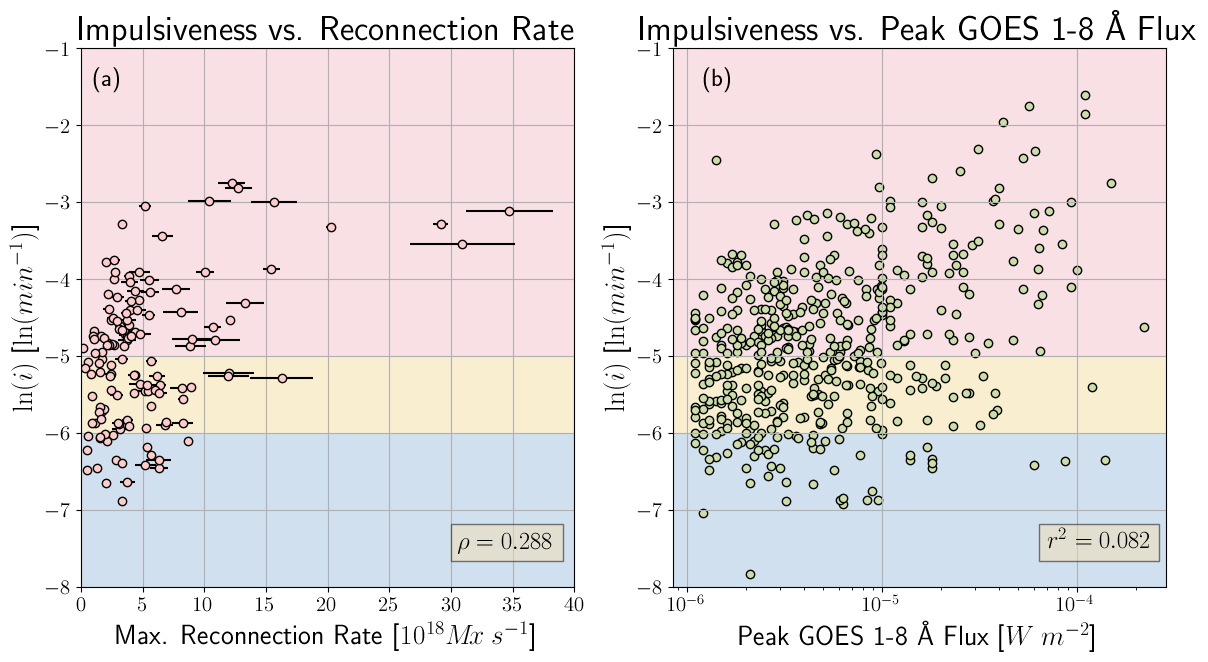

In [232]:
from matplotlib.ticker import FuncFormatter

def math_formatter(x, pos):
    return "$%s$"% int(x)

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

ax1.axhspan(-8, -6, facecolor='#6699CC', alpha=0.3)
ax1.axhspan(-6, -5, facecolor='#EECC66', alpha=0.3)
ax1.axhspan(-5, -1, facecolor='#EE99AA', alpha=0.3)
ax1.errorbar(recmaxmean_ex,best_imp_ex, xerr=imbrate_ex,fmt="o",ecolor='black',markerfacecolor='#FFCCCC',markeredgecolor='black')


ax1.grid()
ax1.set_xlim([0,40])
x=list(range(0,45,5))
y=range(-8,0,1)
ax1.set_yticklabels(y,fontsize=15)
ax1.set_xticklabels(x,fontsize=15)

ax1.xaxis.set_major_formatter(FuncFormatter(math_formatter))
ax1.yaxis.set_major_formatter(FuncFormatter(math_formatter)) 

ax1.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax1.set_xlabel('Max. Reconnection Rate [$10^{18} M\!x\: s^{-1}$]',fontsize=20)
ax1.set_title('Impulsiveness vs. Reconnection Rate',fontsize=25)

props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax1.text(30.6,-7.5, r'$\rho = 0.288$', fontsize=18,bbox = props)
ax1.text(1,-1.5, r'(a)', fontsize=18)

ax1.set_ylim(-8,-1)


ax2.axhspan(-8, -6, facecolor='#6699CC', alpha=0.3)
ax2.axhspan(-6, -5, facecolor='#EECC66', alpha=0.3)
ax2.axhspan(-5, -1, facecolor='#EE99AA', alpha=0.3)

ax2.scatter(goes_flux,best_imp,facecolor='#CCDDAA',edgecolor='black')
ax2.grid()
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax2.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax2.set_xlabel('Peak GOES 1-8 \AA\ Flux [$W\:m^{-2}$]',fontsize=20)
ax2.set_title('Impulsiveness vs. Peak GOES 1-8 \AA\ Flux',fontsize=25)
props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax2.text(7e-5,-7.5, r'$r^2 = 0.082$', fontsize=18,bbox = props)
ax2.text(1.2e-6,-1.5, r'(b)', fontsize=18)

ax2.set_ylim(-8,-1)

plt.savefig('/Users/coletamburri/Desktop/imp_goes_recrate.png', dpi=300)

In [199]:
cc_imp_goes = np.corrcoef(ma.masked_invalid(goes_flux),ma.masked_invalid(best_imp))[0,1]**2
print(cc_imp_goes)

0.08193511727773427


In [234]:
cc_imp_recrate = np.corrcoef(recmaxmean_ex,best_imp_ex)[0,1]**2
cc_imp_recrate

0.1832190107631756

In [229]:
import scipy

In [231]:
spearmancc = scipy.stats.spearmanr(recmaxmean_ex,best_imp_ex)
spearmancc

SpearmanrResult(correlation=0.28872318558527044, pvalue=0.0005410397133359079)

In [233]:
spearmancc2 = scipy.stats.spearmanr(ma.masked_invalid(goes_flux),ma.masked_invalid(best_imp))
print(spearmancc2)

SpearmanrResult(correlation=0.3021840295484789, pvalue=1.3611888494888893e-11)


In [213]:
best_imp_ex = np.array(best_imp_ex)
recmaxmean_ex = np.array(recmaxmean_ex)

In [221]:
len(best_imp_ex)

140

In [214]:
len(best_imp_ex[best_imp_ex>-5])

72

In [218]:
len(best_imp_ex[recmaxmean_ex>10])

17

In [220]:
len(best_imp_ex[(recmaxmean_ex>10) & (best_imp_ex>-5)])

14

In [222]:
72/140

0.5142857142857142

In [224]:
len(best_imp_ex[(recmaxmean_ex<10) & (best_imp_ex>-5)])/len(best_imp_ex[recmaxmean_ex<10])

0.4715447154471545